# EDA of Lending Club Loan Dataset
The purpose of this code is to perform exploratory data analysis on the loan dataset available from the The Lending Club. Lending Club is the finanacial company which provide loans to customers for various purpose. The loan data/file contains information about past loan applicants.

The aim is to identify variables and patterns which lead to loan default.

In [92]:
#importing libraries required for the analysis
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#to see all the rows/columns in scrollable window
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Understanding data

In [552]:
#load data from csv to dataframe
df=pd.read_csv('loan.csv', low_memory=False)

In [553]:
df.shape

(39717, 111)

In [554]:
#Looking at columns
sorted(df.columns)

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'dti',
 'dti_joint',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'max_bal_bc',
 'member_id',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_

After going through the columns and understanding their meaning through data dictionary following are some insights:

Data contains the complete loan data for all loans issued through the time period 2007 to 2011.

The target variable in this analysis is 'loan_status' column which contains information of whether the customer has defaulted or not.

All variables/columns can be broadly classified into 'consumer attributes' and 'loan attributes'

Following is the list of relevant columns prepared by exluding the
- Columns/variables/features which are not useful.
- Columns/variables/features which are irrelevant to the analysis
- Columns/variables/features which have redundant information
- Columns/variables/features which will not be available to LC during portfolio risk analysis.

['addr_state',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'dti',
 'dti_joint',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'pymnt_plan',
 'sub_grade',
 'tax_liens',
 'term',
 'verification_status',
 'verification_status_joint']

# 1. Data Cleaning

## a) Fixing Rows and Columns
From above data understanding;
- There are no rows which are required to be removed at this stage.
- We have identified a list of columns which are required for further analysis so keeping only those columns in data.

In [555]:
required_columns = ['addr_state',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'dti',
 'dti_joint',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'id',
 'installment',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'pub_rec',
 'purpose',
 'pymnt_plan',
 'sub_grade',
 'term',
 'verification_status',
 'verification_status_joint']

In [556]:
#finding columns to drop
columns_to_drop = [col for col in df.columns if col not in required_columns]

In [557]:
df.drop(labels=columns_to_drop, axis=1, inplace=True)

Columns with 1 unique value or very high percentage of unique values do not help in analysis. Lets check unique value count.

In [558]:
pd.DataFrame(df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

,Unique Value Count
verification_status_joint,1
annual_inc_joint,1
application_type,1
pymnt_plan,1
dti_joint,1
term,2
loan_status,3
verification_status,3
home_ownership,5
pub_rec,5


In [559]:
df.shape

(39717, 23)

'application_type','pymnt_plan', 'emp_title', 'id' either have very high percentage of unique values or only one unique value.

In [560]:
df.drop(['application_type','pymnt_plan', 'emp_title', 'id'], axis=1, inplace=True)

In [561]:
df.shape

(39717, 19)

## a) Fix missing values
We will find the percentage of null/missing values in each column to decide whether to remove column.

In [562]:
#percentage of missing values in each coloumn
percentage_of_null_values = (df.isnull().sum()/len(df.index)*100)
percentage_of_null_values

loan_amnt                      0.00000
term                           0.00000
int_rate                       0.00000
installment                    0.00000
grade                          0.00000
sub_grade                      0.00000
emp_length                     2.70665
home_ownership                 0.00000
annual_inc                     0.00000
verification_status            0.00000
issue_d                        0.00000
loan_status                    0.00000
purpose                        0.00000
addr_state                     0.00000
dti                            0.00000
pub_rec                        0.00000
annual_inc_joint             100.00000
dti_joint                    100.00000
verification_status_joint    100.00000
dtype: float64

There are colums 'annual_inc_joint', 'dti_joint' and 'verification_status_joint' which can be removed as all of the values are missing.

In [563]:
#droppingt columns with 100% missing data
df.drop([ 'annual_inc_joint','dti_joint','verification_status_joint'], axis=1, inplace=True)

In [564]:
df.shape

(39717, 16)

In [565]:
#finding columns with missing values
columns_with_missing_values = (df.isnull().sum()/len(df.index))*100
columns_with_missing_values[columns_with_missing_values != 0]

emp_length    2.70665
dtype: float64

Number of missing values is insignificant in above column so will not drop them nor will impute the values.

# Standardize values

In [566]:
df.describe()

,loan_amnt,installment,annual_inc,dti,pub_rec
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000
mean,11219.443815,324.561922,6.896893e+04,13.315130,0.055065
std,7456.670694,208.874874,6.379377e+04,6.678594,0.237200
min,500.000000,15.690000,4.000000e+03,0.000000,0.000000
25%,5500.000000,167.020000,4.040400e+04,8.170000,0.000000
50%,10000.000000,280.220000,5.900000e+04,13.400000,0.000000
75%,15000.000000,430.780000,8.230000e+04,18.600000,0.000000
max,35000.000000,1305.190000,6.000000e+06,29.990000,4.000000


<Axes: xlabel='annual_inc', ylabel='Count'>

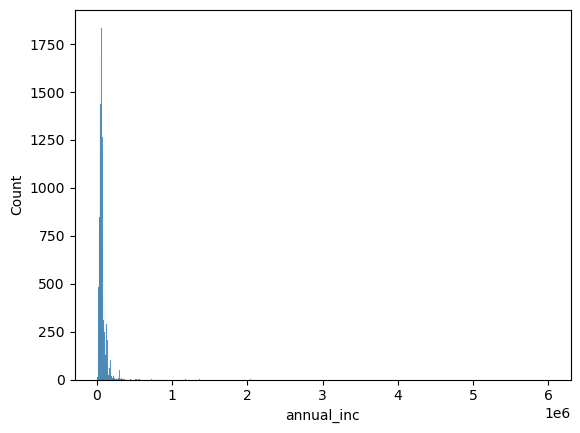

In [567]:
#from above description 'annual_inc'
sns.histplot(df["annual_inc"])

Removing otliers using IQR

In [568]:
percentile25 = df['annual_inc'].quantile(0.25)
percentile75 = df['annual_inc'].quantile(0.75)

In [569]:
iqr = percentile75-percentile25

In [571]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [572]:
df = df[df['annual_inc'] < upper_limit]
df = df[df['annual_inc'] > lower_limit]

In [573]:
df.shape

(37874, 16)

<Axes: xlabel='annual_inc', ylabel='Count'>

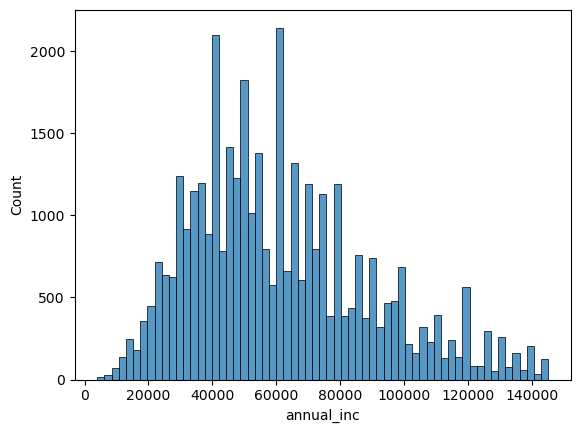

In [574]:
sns.histplot(df["annual_inc"])

## c) Fix invalid values

In [575]:
#Check data types
df.dtypes

loan_amnt                int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
pub_rec                  int64
dtype: object

In [576]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0


We will remove '%' string from the 'int_rate' column and convert it to numeric.

In [578]:
df['int_rate'] = df['int_rate'].str.strip('%').astype('float')

AttributeError: Can only use .str accessor with string values!

In [658]:
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [653]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [654]:
df.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
pub_rec                        object
loan_default                    int64
loan_amnt_level              category
int_rate_level               category
installment_level            category
annual_inc_level             category
dti_level                    category
year                            int32
month                           int32
dtype: object

## Filter Data

We will check and remove any duplicate rows.

In [580]:
#find duplicate rows
df.duplicated().sum()

0

### Our target variable is 'loan_status' lets understand it

In [659]:
#knowing the values
df['loan_status'].value_counts()

loan_status
Fully Paid     31386
Charged Off     5431
Name: count, dtype: int64

Loan records with 'Current' status will not contribute in analysis of defaulters so will remove the records/rows with 'Current' loan status.

In [582]:
df = df[df['loan_status'] != 'Current']
#df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

#converting loan_status to integer type
#df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

In [660]:
df['loan_status'].value_counts()

loan_status
Fully Paid     31386
Charged Off     5431
Name: count, dtype: int64

In [661]:
df.shape

(36817, 24)

# Data Analysis
Our aim is to find variables which lead to 'Charged Off'(Default) status of the loan. To find the impact of other variables in 'loan_status' we will perform Segmented Univariate Analysis and Bivariate Analysis.

In [597]:
df.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec                   int64
loan_default              int64
loan_amnt_level        category
int_rate_level         category
dtype: object

## Derived Metrics/Columns

In [598]:
df['loan_default'] = df['loan_status'].apply(lambda x: 100 if x=='Charged Off' else 0)

In [599]:
df['loan_default'].value_counts()

loan_default
0      31386
100     5431
Name: count, dtype: int64

In [613]:
df['loan_default'].describe()

count    36817.000000
mean        14.751338
std         35.462177
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: loan_default, dtype: float64

In [600]:
df['loan_amnt'].describe()

count    36817.000000
mean     10706.805280
std       7067.980083
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [601]:
bins = [0, 5000, 9250, 15000, 35000]
labels = ['low', 'medium', 'high', 'very high']
df['loan_amnt_level'] = pd.cut(x = df['loan_amnt'], bins = bins, labels = labels, include_lowest = True)

In [602]:
df['loan_amnt_level'].value_counts()

loan_amnt_level
high         10727
low           9335
medium        9098
very high     7657
Name: count, dtype: int64

In [592]:
df['int_rate'].describe()

count    36817.000000
mean        11.889986
std          3.668766
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [603]:
bins = [0, 8.94, 11.71, 14.27, 24.40]
labels = ['low', 'medium', 'high', 'very high']
df['int_rate_level'] = pd.cut(x = df['int_rate'], bins = bins, labels = labels, include_lowest = True)

In [594]:
df['int_rate_level'].value_counts()

int_rate_level
low          9453
very high    9196
medium       9103
high         9065
Name: count, dtype: int64

In [604]:
df['installment'].describe()

count    36817.000000
mean       312.587151
std        199.803230
min         15.690000
25%        163.300000
50%        271.140000
75%        409.700000
max       1305.190000
Name: installment, dtype: float64

In [605]:
bins = [0, 163.30, 271.14, 409.70, 1305.19]
labels = ['low', 'medium', 'high', 'very high']
df['installment_level'] = pd.cut(x = df['installment'], bins = bins, labels = labels, include_lowest = True)

In [368]:
df['installment_level'].value_counts()

installment_level
medium       9208
low          9205
high         9202
very high    9202
Name: count, dtype: int64

In [370]:
df['annual_inc'].describe()

count     36817.000000
mean      61222.745181
std       28230.572587
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145008.000000
Name: annual_inc, dtype: float64

In [606]:
bins = [0, 40000, 56000, 78000, 145008]
labels = ['low', 'medium', 'high', 'very high']
df['annual_inc_level'] = pd.cut(x = df['annual_inc'], bins = bins, labels = labels, include_lowest = True)

In [372]:
df['annual_inc_level'].value_counts()

annual_inc_level
low          9698
high         9298
very high    9085
medium       8736
Name: count, dtype: int64

In [374]:
df['dti'].describe()

count    36817.000000
mean        13.437576
std          6.660494
min          0.000000
25%          8.340000
50%         13.570000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

In [607]:
bins = [0, 8.34, 13.57, 18.70, 29.99]
labels = ['low', 'medium', 'high', 'very high']
df['dti_level'] = pd.cut(x = df['dti'], bins = bins, labels = labels, include_lowest = True)

In [391]:
df['dti_level'].value_counts()

dti_level
low          9218
medium       9210
high         9195
very high    9194
Name: count, dtype: int64

In [550]:
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [655]:
df['year'] = pd.DatetimeIndex(df['issue_d']).year
df['month'] = pd.DatetimeIndex(df['issue_d']).month

In [656]:
df['year'].value_counts()

year
2011    19533
2010    11061
2009     4498
2008     1494
2007      231
Name: count, dtype: int64

In [657]:
df['month'].value_counts()

month
12    4040
11    3834
10    3550
9     3303
8     3230
7     3212
6     3027
5     2800
4     2721
3     2563
1     2274
2     2263
Name: count, dtype: int64

In [ ]:
Now the remaining We will convert the following features to ordinal attributes

In [618]:
df['pub_rec'] = df['pub_rec'].astype(str)
#df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(str)
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

In [622]:
df.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
pub_rec                        object
loan_default                    int64
loan_amnt_level              category
int_rate_level               category
installment_level            category
annual_inc_level             category
dti_level                    category
year                            int32
month                           int32
dtype: object

In [356]:
numeric_columns=["loan_amnt","int_rate","installment","annual_inc","dti","loan_status"]

# Segmented Univariate Analysis

We will use Bar Plots and put 'loan_default' on y-axis so that it will show average defaults in a segment which is also called as 'Loan default rate' in buisness terms.

<Axes: xlabel='loan_amnt_level', ylabel='loan_default'>

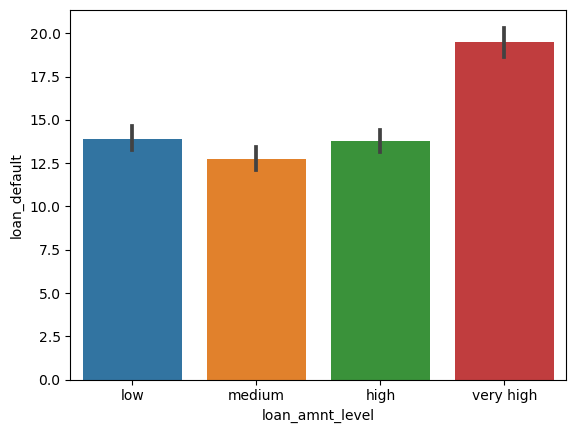

In [625]:
sns.barplot(x='loan_amnt_level', y='loan_default', data=df)

<Axes: xlabel='term', ylabel='loan_default'>

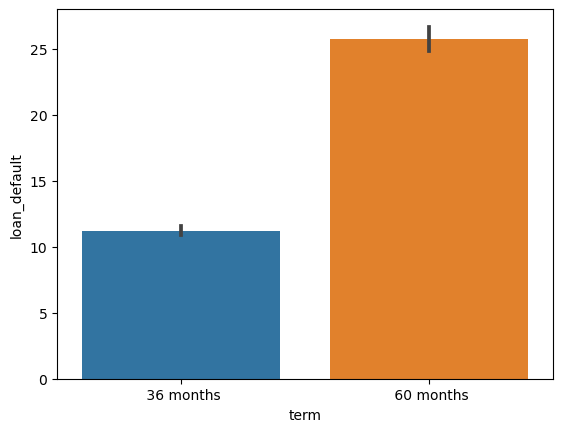

In [626]:
sns.barplot(x='term', y='loan_default', data=df)

<Axes: xlabel='int_rate_level', ylabel='loan_default'>

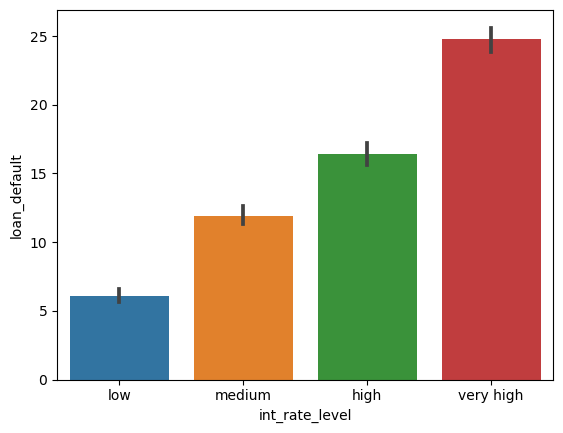

In [628]:
sns.barplot(x='int_rate_level', y='loan_default', data=df)

<Axes: xlabel='installment_level', ylabel='loan_default'>

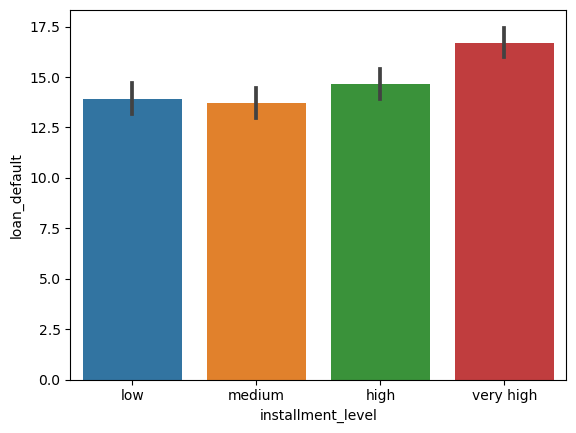

In [629]:
sns.barplot(x='installment_level', y='loan_default', data=df)

<Axes: xlabel='grade', ylabel='loan_default'>

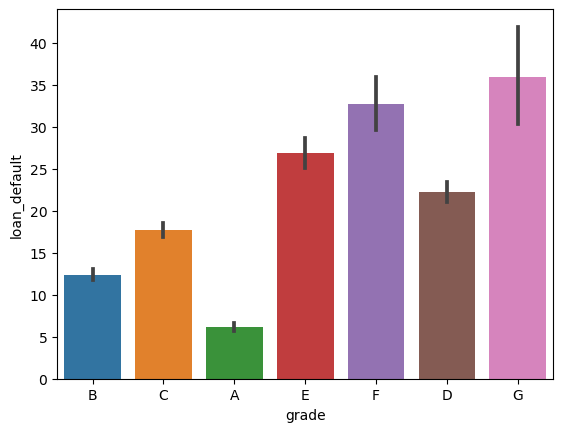

In [630]:
sns.barplot(x='grade', y='loan_default', data=df)

<Axes: xlabel='sub_grade', ylabel='loan_default'>

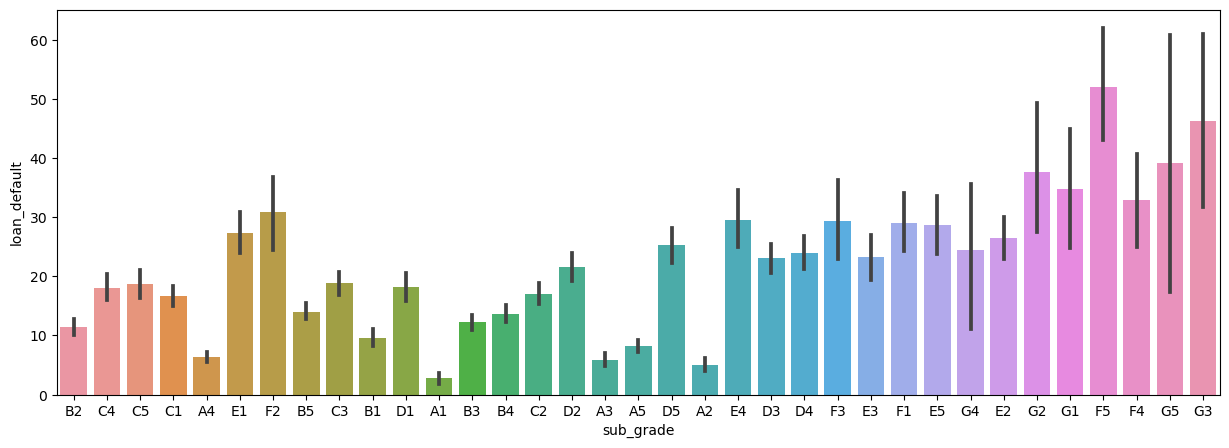

In [633]:
plt.figure(figsize=(15,5))
sns.barplot(x='sub_grade', y='loan_default', data=df)

<Axes: xlabel='emp_length', ylabel='loan_default'>

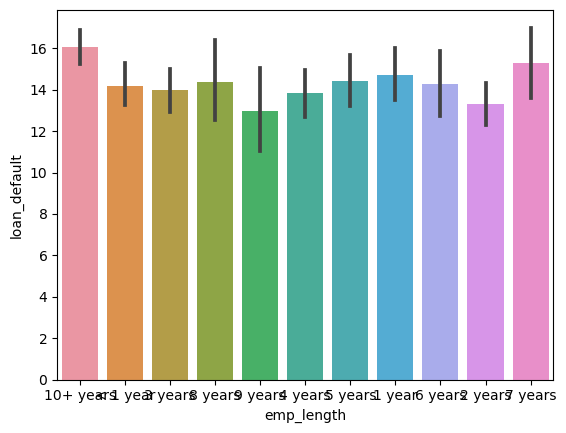

In [634]:
sns.barplot(x='emp_length', y='loan_default', data=df)

<Axes: xlabel='home_ownership', ylabel='default'>

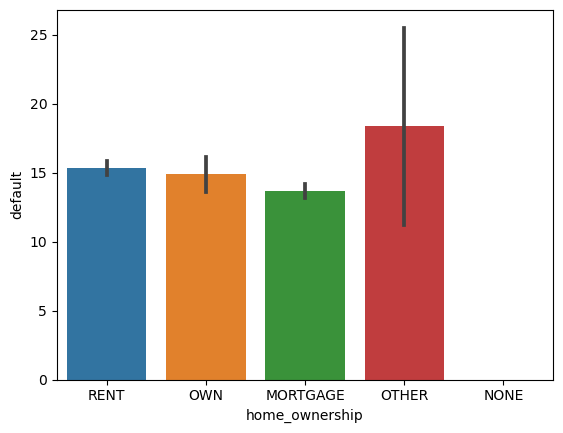

In [294]:
sns.barplot(x='home_ownership', y='loan_default', data=df)

<Axes: xlabel='annual_inc_level', ylabel='loan_default'>

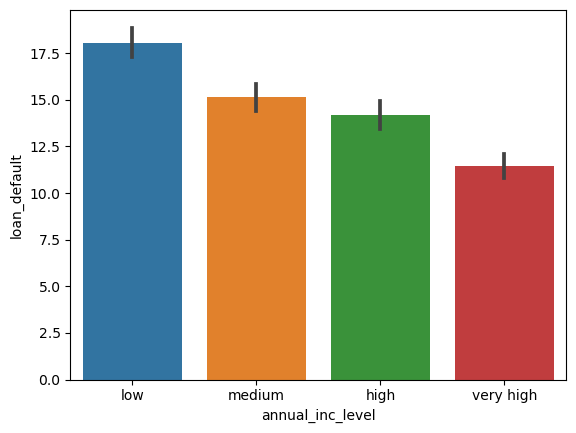

In [635]:
sns.barplot(x='annual_inc_level', y='loan_default', data=df)

<Axes: xlabel='verification_status', ylabel='loan_default'>

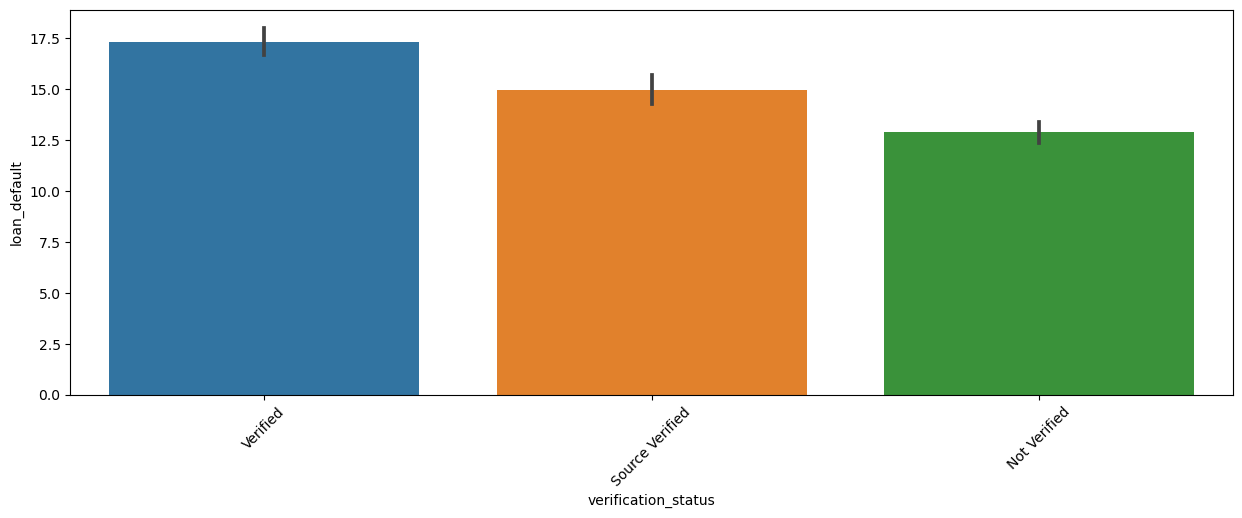

In [636]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='verification_status', y='loan_default', data=df)

<Axes: xlabel='year', ylabel='loan_default'>

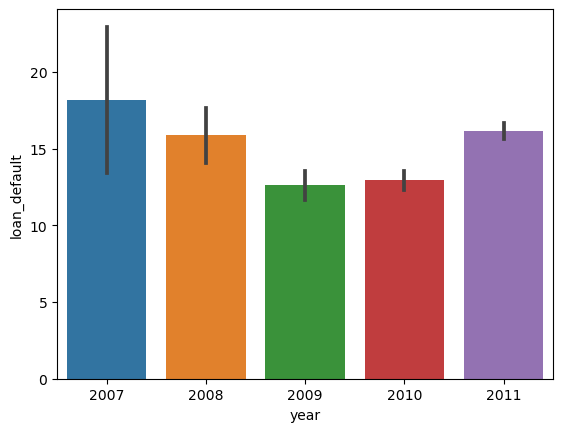

In [637]:
#dfPlot = df.sort_values(['loan_default']).reset_index(drop=True)
sns.barplot(x='year', y='loan_default', data=df)

<Axes: xlabel='month', ylabel='loan_default'>

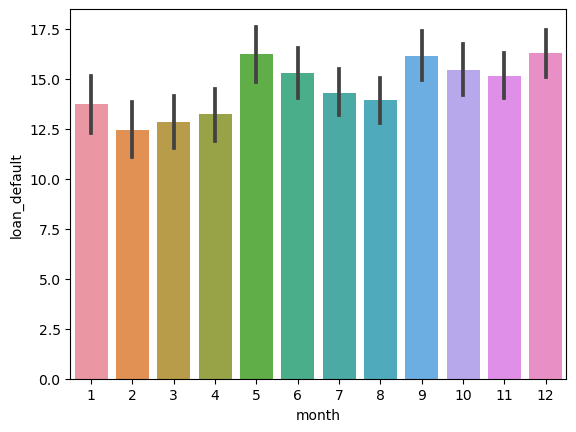

In [638]:
#dfPlot = df.sort_values(['loan_default']).reset_index(drop=True)
sns.barplot(x='month', y='loan_default', data=df)

<Axes: xlabel='purpose', ylabel='loan_default'>

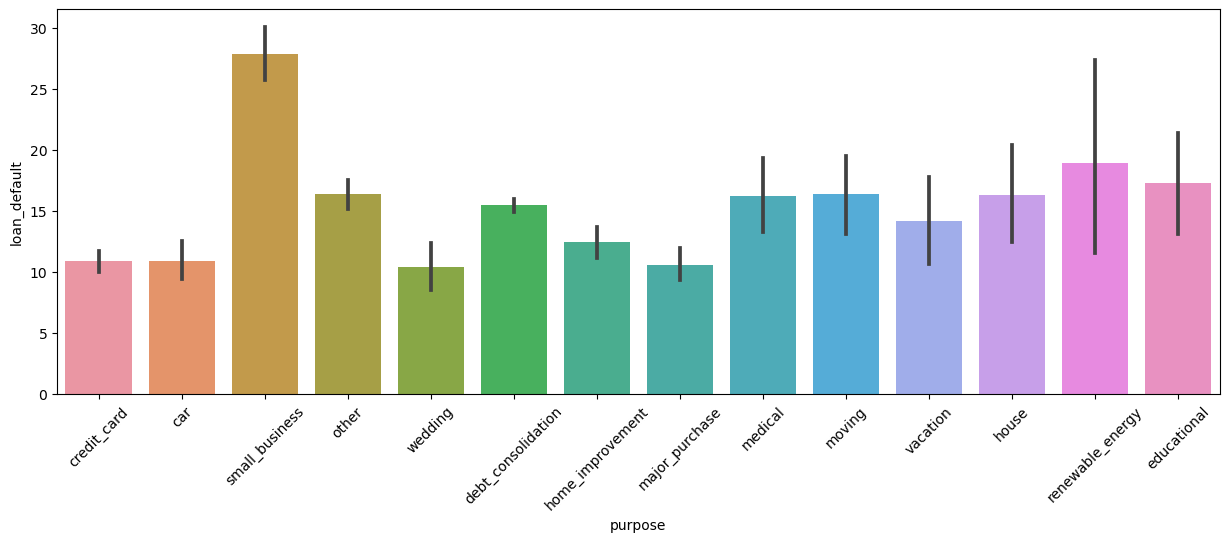

In [642]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='purpose', y='loan_default', data=df)

<Axes: xlabel='addr_state', ylabel='loan_default'>

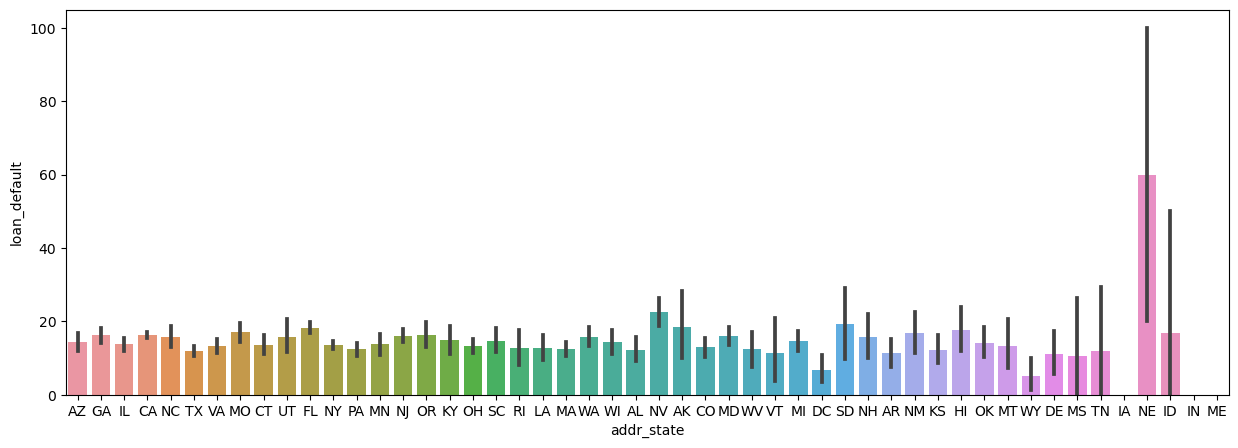

In [439]:
plt.figure(figsize=(15,5))
#dfPlot = df.sort_values(['loan_default']).reset_index(drop=True)
sns.barplot(x='addr_state', y='loan_default', data=df)

There is a spike of default rate in state 'NE' so will have alook at the data.

In [651]:
df[df["addr_state"]=='NE']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,loan_default,loan_amnt_level,int_rate_level,installment_level,annual_inc_level,dti_level,year,month
38685,7500,36 months,12.61,251.30,D,D1,10+ years,MORTGAGE,75000.0,Not Verified,2008-05-01,Fully Paid,debt_consolidation,NE,20.58,0,0,medium,high,medium,high,very high,2008,5
39500,14400,36 months,12.80,483.81,D,D4,1 year,RENT,36120.0,Not Verified,2007-12-01,Charged Off,debt_consolidation,NE,8.47,0,100,high,high,very high,low,medium,2007,12
39651,4800,36 months,11.22,157.66,C,C4,5 years,RENT,30000.0,Not Verified,2007-09-01,Fully Paid,debt_consolidation,NE,12.36,0,0,low,medium,low,low,medium,2007,9
39667,2500,36 months,12.80,84.00,D,D4,< 1 year,MORTGAGE,32000.0,Not Verified,2007-08-01,Charged Off,home_improvement,NE,20.00,0,100,low,high,low,low,very high,2007,8
39668,2500,36 months,9.64,80.26,B,B4,< 1 year,MORTGAGE,75000.0,Not Verified,2007-08-01,Charged Off,home_improvement,NE,20.00,0,100,low,medium,low,high,very high,2007,8


The spike is due to very small number of loan records and out of 5 loans 3 have default hence such a high default rate of around 60%. Also default rates do not vary much accross the states so we can conclude that states do not influence much.

<Axes: xlabel='dti_level', ylabel='loan_default'>

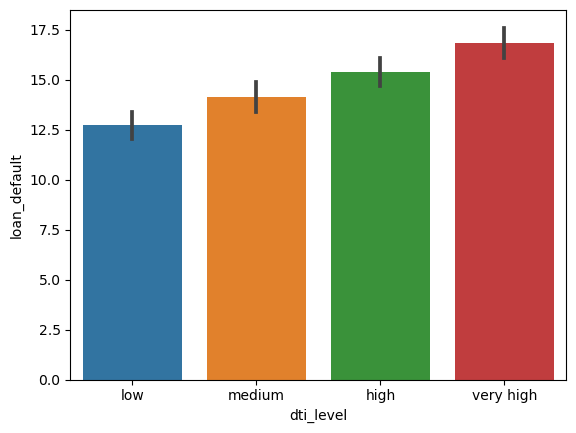

In [652]:
sns.barplot(x='dti_level', y='loan_default', data=df)

In [ ]:
sns.barplot(x='dti_level', y='loan_default', data=df)

## Bivariate Analysis

In [615]:
category_columns=["loan_amnt_level","int_rate_level","installment_level","annual_inc_level","dti_level","term","grade","sub_grade","emp_length","home_ownership",
                  "verification_status","purpose",'pub_rec','year','month']

list2 = []
for col in category_columns:
    default_rates = df.groupby(col).loan_default.mean().sort_values(ascending=False)
    #default_rates = default_rates.sort_values(ascending=False).reset_index(drop=True)
    list1 = [col, round(default_rates[0] - default_rates[-1],2)]
    list2.append(list1)
#print(list2)
df_impact = pd.DataFrame(list2, columns=['Category', 'Impact']) 
df_impact.sort_values(by=['Impact'], ascending=False)

KeyError: -1

We can see that 'sub_grade' has the highest impact on default rates. Now we will see Bivariate analysis that is analyse 2 categorical variables with 'loan_default' rate. We will see other categorical variables in context with the highest impact variable 'sub_grade'.

<Axes: xlabel='grade', ylabel='count'>

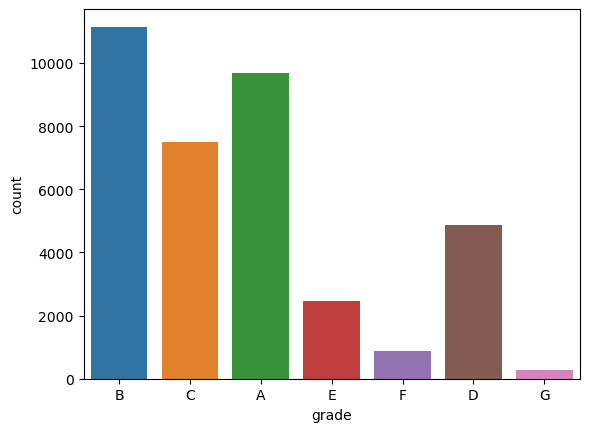

In [454]:
sns.countplot(x=df["grade"])

In [456]:
major_grades = ["A","B","C","D"]
df = df[df['grade'].isin(major_grades)]

<Axes: xlabel='purpose', ylabel='loan_default'>

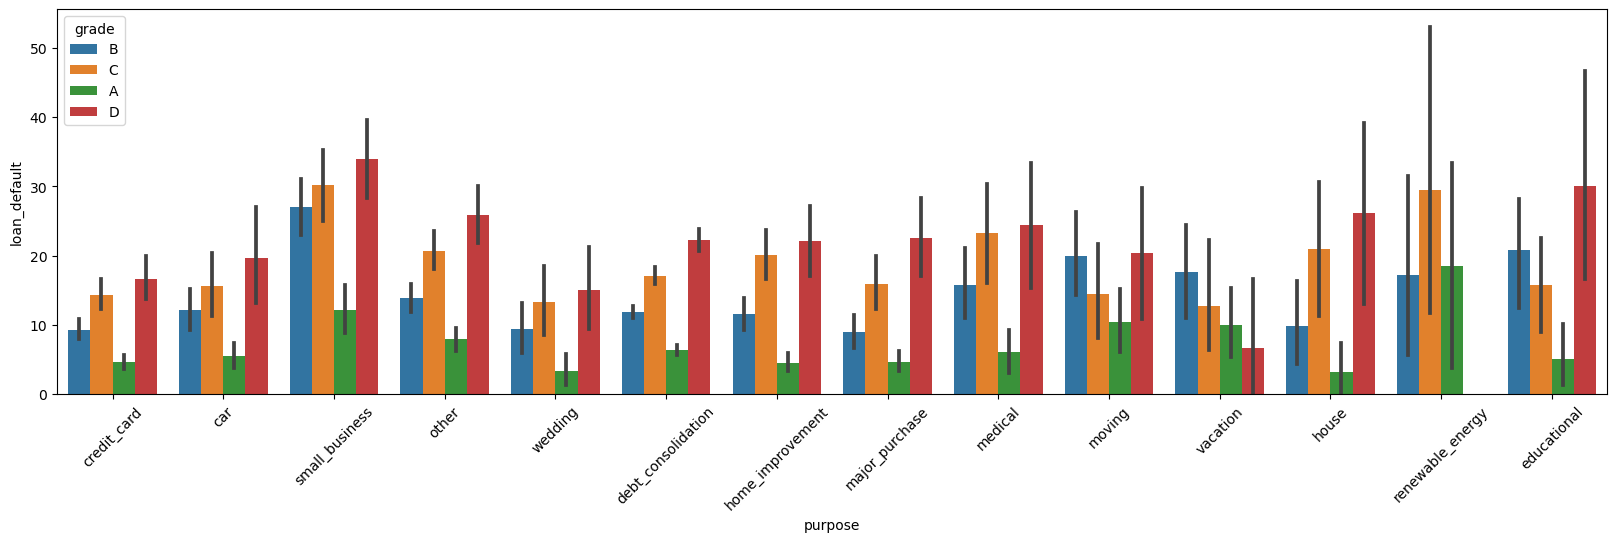

In [458]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x='purpose', y='loan_default', data=df, hue='grade')

<Axes: xlabel='emp_length', ylabel='loan_default'>

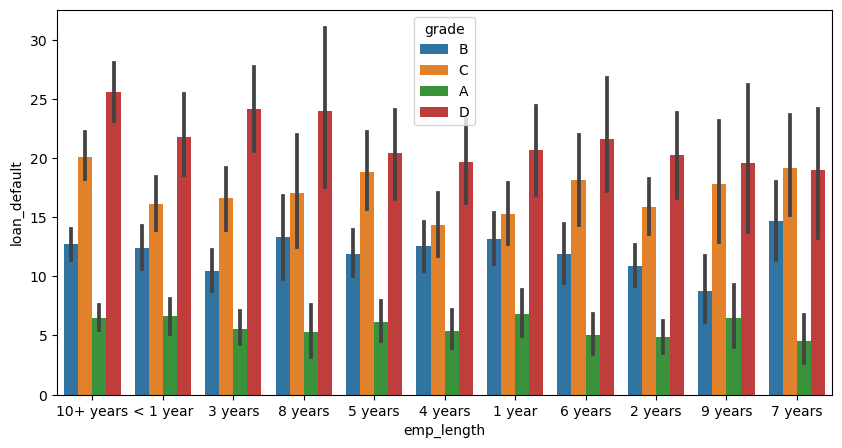

In [459]:
plt.figure(figsize=(10,5))
sns.barplot(x='emp_length', y='loan_default', data=df, hue='grade')

<Axes: xlabel='grade', ylabel='loan_default'>

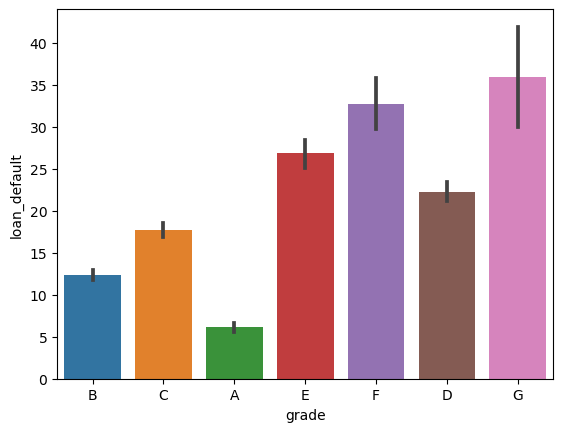

In [409]:
sns.barplot(x='grade', y='loan_default', data=df)